# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can
ask a bunch of interesting questions about the history of the
LEGO company, their product offering, and which LEGO set ultimately rules
them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did
it have?</li>
<li>How did the LEGO company start out? In which year were the first LEGO sets
released and how many sets did the company sell when it first launched?</li>
<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like
Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>
<li>When did the LEGO company really expand its product offering? Can we spot
a change in the company strategy based on how many themes and sets did it
released year-on-year?</li>
<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the
LEGO pieces in existence. I recommend you use download the .csv files provided
in this lesson.

<img src="assets/bricks.jpg">

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: <br>
How many colours does the LEGO company produce?
Read the colors.csv file in the data folder and find the total number of
unique colours. Try using the
[.nunique() method](
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique)
to accomplish this.

In [2]:
colors_path = 'data/colors.csv'
colors = pd.read_csv(colors_path)
colors

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [3]:
num_of_unique_colors = colors['name'].nunique()
print(f"Number of unique colors: {num_of_unique_colors}")

Number of unique colors: 135


**Challenge**: <br>
Find the number of transparent colours where <code>is_trans == 't'</code>
versus the number of opaque colours where <code>is_trans == 'f'</code>.
See if you can accomplish this in two different ways.

In [4]:
num_of_transparent_colors = colors['is_trans'].value_counts()[1]
print(f"Number of transparent colors: {num_of_transparent_colors}")

Number of transparent colors: 28


In [5]:
num_of_transparent_colors = colors.groupby('is_trans').count()['name'][1]
num_of_opaque_colors = num_of_unique_colors - num_of_transparent_colors
print(f"Number of transparent colors: {num_of_transparent_colors}")
print(f"Number of opaque colors: {num_of_opaque_colors}")

Number of transparent colors: 28
Number of opaque colors: 107


**Challenge**: <br>
Change the following header into an h3 section heading: <br>
Understanding LEGO Themes vs. LEGO Sets

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store, and you will see their products organised by themes.
Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**:

Display this image: https://i.imgur.com/aKcwkSx.png

<img src='assets/lego_themes.png'>

A lego set is a particular box of LEGO or product. Therefore, a single theme
typically has many sets.

**Challenge**: <br>
Display this image https://i.imgur.com/whB1olq.png

<img src='assets/lego_sets.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the
number of parts that each of these sets contained.

**Challenge**: <br>
Read the sets.csv data and take a look at the first and last couple of rows.

In [6]:
lego_sets_path = 'data/sets.csv'
lego_sets = pd.read_csv(lego_sets_path)

In [7]:
lego_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [8]:
lego_sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: <br>
In which year were the first LEGO sets released and what were these sets called?

In [9]:
lego_sets_year_sorted = lego_sets.sort_values('year', ascending=True)
first_year = lego_sets_year_sorted['year'].values[0]
sets_in_first_year = lego_sets_year_sorted[lego_sets_year_sorted['year'] == first_year][['name', 'year']]
sets_in_first_year

,name,year
9521,Extra-Large Gift Set (ABB),1949
9534,Large Gift Set (ABB),1949
9539,Medium Gift Set (ABB),1949
9544,Small Brick Set (ABB),1949
9545,Small Doors and Windows Set (ABB),1949


**Challenge**: <br>
How many sets did LEGO sell in their first year?

In [10]:
num_of_sets_first_year = sets_in_first_year.count()['name']
num_of_sets_first_year

5

**Challenge**: <br>
Find the top 5 LEGO sets with the highest number of parts.

In [11]:
lego_sets_parts_sorted = lego_sets.sort_values('num_parts',
                                               ascending=False)
lego_sets_parts_sorted.head()[['name', 'num_parts']]

,name,num_parts
15004,The Ultimate Battle for Chima,9987
11183,UCS Millennium Falcon,7541
10551,Hogwarts Castle,6020
295,Taj Mahal,5923
221,Taj Mahal,5922


**Challenge**: <br>
Use <code>.groupby()</code> and <code>.count()</code> to show the number of
LEGO sets released year-on-year. How do the number of sets released in 1955
compare to the number of sets released in 2019?

In [12]:
lego_sets_each_year = lego_sets.groupby('year').count()[['name']]
lego_sets_each_year

,name
year,
1949,5
1950,6
1953,4
1954,14
1955,28
...,...
2017,786
2018,816
2019,840


**Challenge**: <br>
Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years,
you will have to exclude some data from your chart. Can you use the slicing
techniques covered in Day 21 to avoid plotting the last two years?
The same syntax will work on Pandas DataFrames.

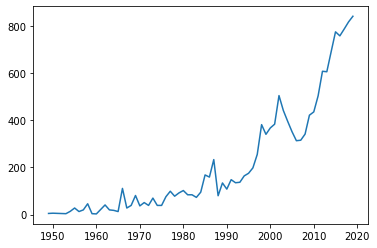

In [13]:
chart_lego_sets_through_years = plt.plot(lego_sets_each_year.index[:-2],
                                         lego_sets_each_year[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by a year.
This means we have to count the number of unique theme_ids per calendar year.

In [14]:
# 1. Group Data based on a 'year' column
# 2. Add dictionary in .agg({dict.key: dict.value})
# 3. dict.key is column, we operate on (we are interested in (unique) 'theme_id')
# 4. dict.value is operation, we want to do (calculate the number of (unique) themes)

different_themes_per_year = lego_sets.groupby('year').agg(
    {'theme_id': pd.Series.nunique})
# Rename the column (theme_id -> num_of_themes)
different_themes_per_year.rename(columns={'theme_id': 'num_of_themes'},
                                 inplace=True)
different_themes_per_year

,num_of_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: <br>
Plot the number of themes released by a year on a line chart. Only include the
full calendar years (i.e., exclude 2020 and 2021).

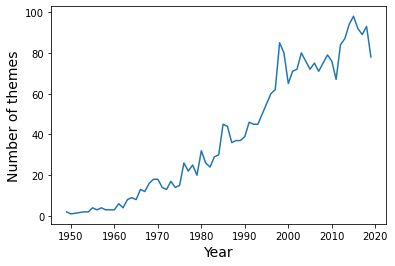

In [15]:
chart_num_of_themes_per_year = plt.plot(different_themes_per_year.index[:-2],
                                        different_themes_per_year[:-2])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of themes', fontsize=14)
plt.show()

### Line Charts with Two Separate Axes

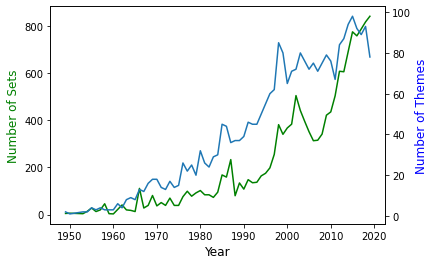

In [16]:
ax1 = plt.gca()  # Get current axis
ax2 = ax1.twinx()  # New y axis with the same x axis

# We add some styling
ax1.plot(lego_sets_each_year.index[:-2], lego_sets_each_year[:-2], color='g')
ax2.plot(different_themes_per_year.index[:-2], different_themes_per_year[:-2])

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Sets', color='g', fontsize=12)
ax2.set_ylabel('Number of Themes', color='b', fontsize=12)

plt.show()

**Challenge**: <br>
Use the <code>.groupby()</code> and <code>.agg()</code> function together to
figure out the average number of parts per set. How many parts did the average
LEGO set released in 1954 compared to say, 2017?

In [17]:
# 1. Group Data based on a 'year' column
# 2. Add dictionary in .agg({dict.key: dict.value})
# 3. dict.key is column, we operate on (we are interested in (avg) 'num_parts')
# 4. dict.value is operation, we want to do (calculate the average (mean) value)

avg_parts_per_set = lego_sets.groupby('year').agg(
    {'num_parts': pd.Series.mean}
)
avg_parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


### Scatter Plots in Matplotlib

**Challenge**: <br>
Has the size and complexity of LEGO sets increased over time based on the
number of parts? Plot the average number of parts over time using a Matplotlib
scatter plot. See if you can use the
[scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html)
before I show you the solution. Do you spot a trend in the chart?

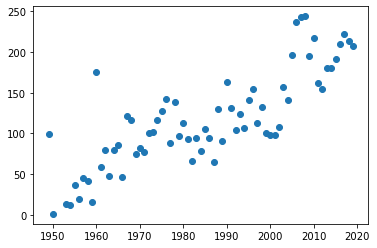

In [18]:
plt.scatter(avg_parts_per_set.index[:-2], avg_parts_per_set[:-2])
plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heroes
to many others. But which theme has the largest number of individual sets?

In [19]:
sets_per_theme = lego_sets['theme_id'].value_counts()
sets_per_theme

158    753
501    656
494    398
435    356
503    329
      ... 
373      1
515      1
531      1
370      1
380      1
Name: theme_id, Length: 571, dtype: int64

**Challenge**: <br>
Use what you know about HTML markup and tags to display the database schema:
https://i.imgur.com/Sg4lcjx.png

<img src='assets/rebrickable_schema.png'>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has
<code>theme_ids</code> which link to the <code>id</code> column in the
themes.csv.

**Challenge**: <br>
Explore the themes.csv. How is it structured? Search for the name 'Star Wars'.
How many <code>id</code>s correspond to this name in the themes.csv? Now use
these <code>id</code>s and find the corresponding the sets in the sets.csv
(Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [20]:
themes_path = 'data/themes.csv'
themes = pd.read_csv(themes_path)

In [21]:
sw_ids_name = themes[themes['name'] == 'Star Wars'][['id', 'name']]
sw_ids_list = list(sw_ids_name['id'])
sw_ids_list

[18, 158, 209, 261]

In [22]:
[lego_sets[lego_sets['theme_id'] == sw_id] for sw_id in sw_ids_list]

[       set_num                                name  year  theme_id  num_parts
 8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
 12051   8000-1                           Pit Droid  2000        18        223
 12058   8001-1                        Battle Droid  2000        18        336
 12066   8002-1                     Destroyer Droid  2000        18        567
 12071   8007-1                               C-3PO  2001        18        339
 12072   8008-1                        Stormtrooper  2001        18        360
 12073   8009-1                               R2-D2  2002        18        239
 12074   8010-1                         Darth Vader  2002        18        388
 12081   8011-1                          Jango Fett  2002        18        425
 12083   8012-1                  Super Battle Droid  2002        18        378
 15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0,
            set_num                                

### Merging (i.e., Combining) DataFrames based on a Key

In [23]:
# We also add names of the columns (dict.keys become names of columns)
sets_per_theme = pd.DataFrame({'id': sets_per_theme.index,
                               'set_count': sets_per_theme.values})
sets_per_theme

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,373,1
567,515,1
568,531,1
569,370,1


In [24]:
# "on='id'" means, the column 'id' is identical in both DataFrames
merged_df = pd.merge(sets_per_theme, themes, on='id')
merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,373,1,Vehicle,365.0
567,515,1,Dinosaurs,507.0
568,531,1,eLAB,529.0
569,370,1,Mosaic,365.0


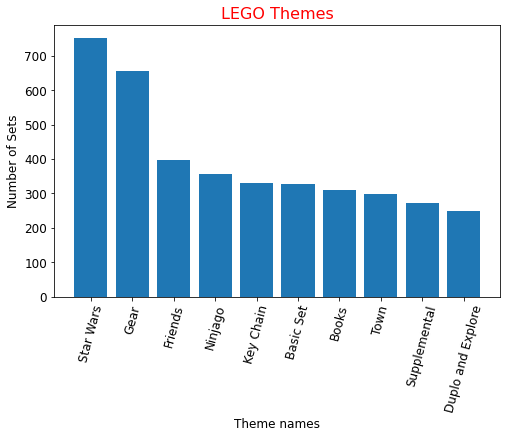

In [25]:
plt.figure(figsize=(8, 5))
plt.title('LEGO Themes', fontsize=16, color='red')
plt.xticks(fontsize=12, rotation=75)  # Rotate the x ticks (names)
plt.yticks(fontsize=12)
plt.xlabel('Theme names', fontsize=12)
plt.ylabel('Number of Sets', fontsize=12)

bar_chart = plt.bar(merged_df['name'][:10], merged_df['set_count'][:10])

plt.show()